1. Load Data

In [3]:
import pandas as pd
import os

# resample_X_filename = "re_X_traffic.csv"
# resample_y_filename = "re_y_traffic.csv"
# filename = 'select_preprocess_label_traffic.csv'
# folder = os.path.join("..", "0_dataset", "traffic")
# models_folder = "models_traffic"

# resample_X_filename = "re_X_syslog.csv"
# resample_y_filename = "re_y_syslog.csv"
# filename = 'select_preprocess_label_syslog.csv'
# folder = os.path.join("..", "0_dataset", "syslog")
# models_folder = "models_logs"

resample_X_filename = "re_X_accounting.csv"
resample_y_filename = "re_y_accounting.csv"
filename = 'select_preprocess_label_atop.csv'
folder = os.path.join("..", "0_dataset", "accounting")
models_folder = "models_accounting"


df = pd.read_csv(os.path.join(folder, filename))
X = df.drop(columns=['Label'])
X = X.values
y = df['Label'].values
y = y.reshape(-1)

2. Define the Models

In [4]:
# linear models
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
# non-linear models
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

# balance data
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight

core = 4 # your computer's maximum core numbers, for improving the training speed


# classes = np.unique(y_train)
# sw = compute_sample_weight(class_weight='balance', y=y_train)
models = {}
# linear models
models['Logistic_Regression'] = LogisticRegression(max_iter=1500, n_jobs=core)
models['SGD'] = SGDClassifier(n_jobs=core)
models['Passive_Aggressive'] = PassiveAggressiveClassifier(n_jobs=core)
# non-linear models
models['Decision_Tree'] = DecisionTreeClassifier()
models['Extra_Tree'] = ExtraTreeClassifier()
models['Gaussian_NB'] = GaussianNB()
models['SVC'] = SVC(kernel='rbf', gamma='auto')
models['KNeighbors'] = KNeighborsClassifier(n_jobs=core)
# ensemble models
# models['XGB'] = XGBClassifier(n_jobs=core)
models['Random_Forest'] = RandomForestClassifier(n_jobs=core)
models['Ada_Boost'] = AdaBoostClassifier()
models['Bagging'] = BaggingClassifier(n_jobs=core)
models['Extra_Trees'] = ExtraTreesClassifier(n_jobs=core)
models['Gradient_Boosting'] = GradientBoostingClassifier()

c:\Users\user\anaconda3\envs\lab\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


3. Training, testing, and evaluation

In [6]:
import os
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# training and testing
evaluation = {}
for name in models:
    evaluation[name] = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# start_re_time = time.time()
# # X_train_re, y_train_re = SMOTE(n_jobs=-1).fit_resample(X_train, y_train)
# if os.path.exists(resample_X_filename) and os.path.exists(resample_y_filename):
#     X_train_re = np.loadtxt(resample_X_filename, delimiter=",")
#     y_train_re = np.loadtxt(resample_y_filename, delimiter=",")
# else:
#     X_train_re, y_train_re = SMOTEENN(n_jobs=-1).fit_resample(X_train, y_train)
#     np.savetxt(resample_X_filename, X_train_re, delimiter=",")
#     np.savetxt(resample_y_filename, y_train_re, delimiter=",")
# end_re_time = time.time()
# print("resample time:{:.3f}s".format(end_re_time - start_re_time))
# print("X_train_re:{}, y_train_re:{}".format(X_train_re, y_train_re))
print(pd.unique(y_test))
print("X_train:{}, y_train:{}".format(len(X_train), len(y_train)))
for name, model in tqdm(models.items()):
    model_filename = os.path.join(models_folder, name)
    if os.path.exists(model_filename): # load the model from disk
        model = pickle.load(open(model_filename, 'rb'))
    else:
        model.fit(X_train, y_train)
        # model.fit(X_train_re, y_train_re)
        pickle.dump(model, open(model_filename, 'wb')) # save the model to disk
    # y_score = model.decision_function(X_test) # for AUC curve
    y_hat = model.predict(X_test) # for f1 score
    
    # evaluation
    # balance_accuracy_score
    evaluation[name]['accuracy'].append(accuracy_score(y_test, y_hat,))
    evaluation[name]['precision'].append(precision_score(y_test, y_hat, average='weighted',zero_division=0))
    evaluation[name]['recall'].append(recall_score(y_test, y_hat, average='weighted', zero_division=0))
    evaluation[name]['f1_score'].append(f1_score(y_test, y_hat, average='weighted', zero_division=0))


[ 0 12  7  5 16 15  8 11 17  3 14  6  2  4  1  9]
X_train:101630, y_train:101630


 46%|████▌     | 6/13 [00:11<00:08,  1.15s/it]

4. Show the model evalution result (F1 score)

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import math

def round_off(value, n):
    return math.floor(value * (10 ** n)) / float(10 ** n) 

models = [name.replace('_', '\n') for name in evaluation]
result = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
for name in evaluation:
    for key, value in evaluation[name].items():
        result[key].append(round_off(mean(value), 3))

NameError: name 'evaluation' is not defined

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

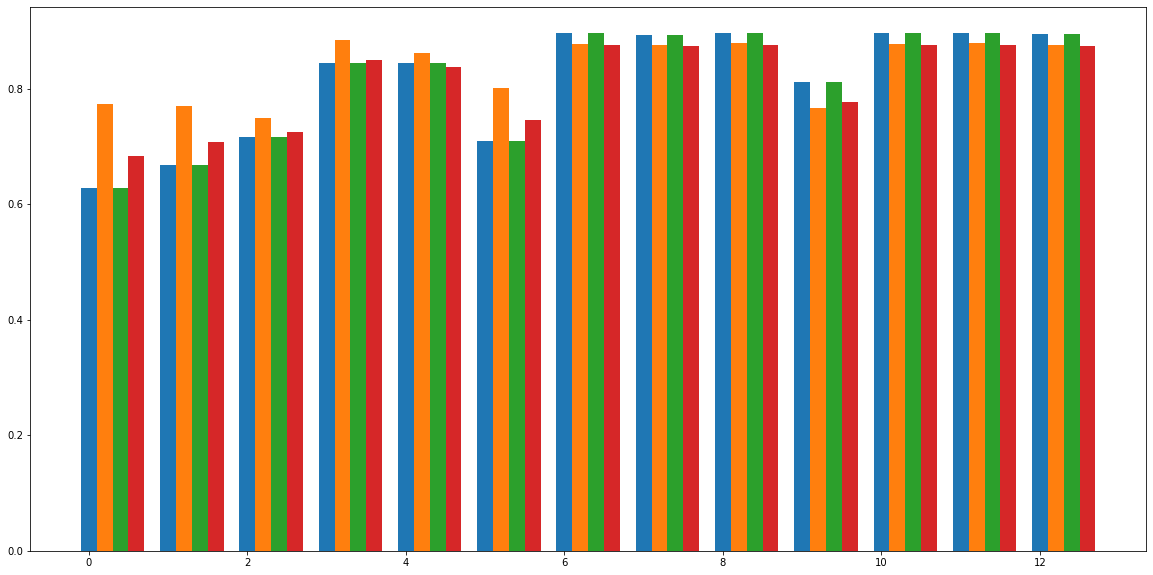

In [8]:
width = 0.2
x = np.arange(len(models))
plt.figure(figsize=(20, 10))
plt.bar(x, result['accuracy'], width, label='accuracy')
plt.bar(x+width, result['precision'], width, label='precision')
plt.bar(x+2*width, result['recall'], width, label='recall')
bar = plt.bar(x+3*width, result['f1_score'], width, label='f1_score')
plt.bar_label(bar, label_type='edge', fontsize=20)
plt.title('Model Evaluation for Accounting', fontsize=30)
plt.xticks(x+1.5*width, models)
plt.xlabel('model', fontsize=25)
plt.ylabel('value', fontsize=25)
plt.rcParams.update({
    'xtick.labelsize': 16,
    'ytick.labelsize': 20,
})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)
plt.show()

In [ ]:
idth = 0.4
x = np.arange(len(models))
plt.figure(figsize=(20, 10))
plt.bar(x, result['accuracy'], width, label='accuracy')
bar = plt.bar(x+width, result['f1_score'], width, label='f1_score')
plt.bar_label(bar, label_type='edge', fontsize=20)
plt.xticks(x+width, models)
plt.title('Model Evaluation for Accounting', fontsize=30)
plt.xticks(x+0.5*width, models)
plt.xlabel('model', fontsize=25)
plt.ylabel('value', fontsize=25)
plt.rcParams.update({
    'xtick.labelsize': 16,
    'ytick.labelsize': 20,
})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = 

plot_confusion_matrix(model, X_test, y_test)  
plt.show()